<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Datos Atípicos </font> </center>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

LI=load_iris()
df=pd.DataFrame(LI.data,columns=LI.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
q3,q1=np.quantile(df,(0.75,0.25),axis=0)
iqr=q3-q1
iqr

array([1.3, 0.5, 3.5, 1.5])

In [3]:
Li=q1-1.5*iqr
Ls=q3+1.5*iqr
Li

array([ 3.15,  2.05, -3.65, -1.95])

In [4]:
Ls

array([ 8.35,  4.05, 10.35,  4.05])

In [5]:
dfcopy=df.copy()
dfcopy.loc[:]=(df<Li)|(df>Ls)
dfcopy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [6]:
df[dfcopy['sepal length (cm)']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [7]:
for c in dfcopy:
    print(df[dfcopy[c]])

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
Li

array([ 3.15,  2.05, -3.65, -1.95])

In [10]:
Ls

array([ 8.35,  4.05, 10.35,  4.05])

<AxesSubplot:>

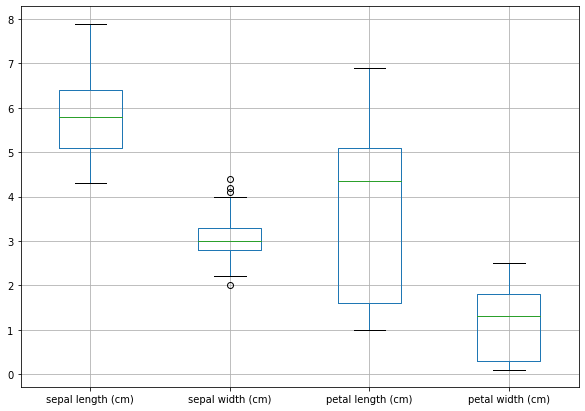

In [11]:
df.boxplot(figsize=(10,7))

## Ejemplo Dataset

#### Detección de outliers univariados

> los outliers tienen una gran relevancia en la detección de anomalías, como la detección de fraudes financieros donde las transacciones fraudulentas tienen comportamientos muy diferentes a los de las transacciones normales.

Existen diversas técnicas para identificar valores atípicos en un conjunto de datos, incluyendo métodos de **inspección visual, métodos estadísticos e incluso modelos de machine learning como el Local Outlier Factor (LOF), el Isolation Forest (IForest) o el algoritmo de K-nearest Neighbors (KNN)**.

Si bien los modelos de machine learning son de gran ayuda en escenarios más complejos como la detección de **outliers multivariados**, para el caso de valores atípicos univariados podemos utilizar los enfoques estadísticos y la inspección visual debido a su simplicidad y eficacia.

Algunos métodos:

> Histograma (Visual).

> Diagrama de caja.

>Z-score y Z-score modificada (estadístico).

>Rango Intercuartílico (IQR).

In [12]:
#dataset "taxis" 
import seaborn as sns

taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [13]:
taxis['total'].describe()

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

### Histograma

Text(0.5, 0, 'Total paid per trip')

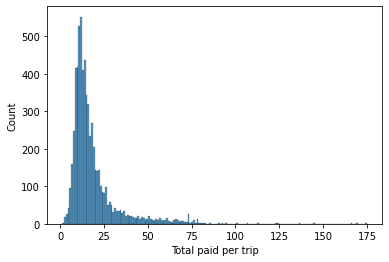

In [14]:
#Usando seaborn
g = sns.histplot(data = taxis, x = 'total')
g.set_xlabel('Total paid per trip')

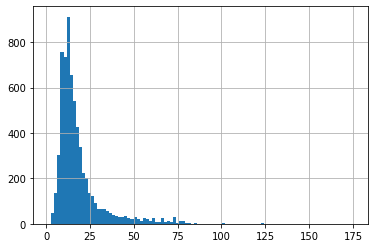

In [16]:
#Usando matplotlib
x=taxis.total # objeto de tipo series
h=x.hist(bins=100)


In [ ]:
# los datos se concentran por debajo de los 40$ aproximadamente, mientras que el resto de barras tienen alturas muy bajas
# y se sitúan muy alejadas del resto de datos
# en este caso los outliers se pueden visualizar con bastante claridad, hay ocasiones en las que no son tan evidentes.
# Además, los histogramas no revelan la ubicación exacta de los outliers.

### Diagrama de caja


> **Caja:** Representa el rango intercuartílico (IQR), que indica la distancia entre el primer y el tercer cuartil.

> **Línea mediana:** Divide el conjunto de datos en dos partes iguales.

> **Bigotes:** Son líneas que se extienden desde los extremos de la caja hasta los valores mínimo y máximo dentro de 1.5 veces el IQR del primer y tercer cuartil.

> **Outliers:** Los valores que caen por fuera de los límites son considerados outliers.

Text(0.5, 0, 'Total paid per trip')

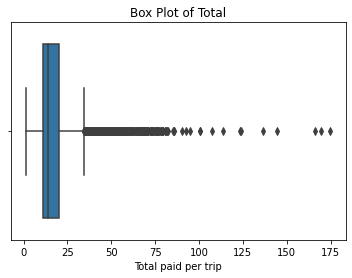

In [17]:
# Box plot
g = sns.boxplot(data = taxis, x = 'total')
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')
#outliers en la columna ‘total’, pero al igual que con el histograma, es recomendable acompañarlo de técnicas adicionales para determinar
#con exactitud la ubicación de estos valores atípicos.

### Z-score

Un **Z-Score** (puntuación Z), es una medida estadística que indica cuántas desviaciones estándar un punto de datos específico está por encima o por debajo de la media del conjunto de datos.

In [18]:
# Import zscore function
from scipy.stats import zscore

# Calculate z-score for each data point and compute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3
outliers = taxis[abs_z_scores > 3]
outliers.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn


In [19]:
len(outliers)

185

La elección de 3 como umbral proviene de la regla empírica, según la cual los datos dentro de 3 veces la desviación estándar respecto a la media representan el 99.7% de los datos de la distribución. Sabiendo esto, podemos concluir con bastante seguridad que los datos que caen más allá de este umbral son atípicos, pues son distintos al 99.7% de los datos.

###  Z-Score modificado

Cuando los datos son asimétricos o no se distribuyen de forma normal podemos utilizar el **z-score modificado (MAD-Z Score)**. el z-score modificado mide cuánto se aleja un valor de la mediana en términos de la desviación absoluta mediana.

$$ M_i = \frac{0.6745*(x_i - Mediana)}{MAD}$$

In [20]:
from scipy.stats import median_abs_deviation

# Obtain the MAD value
mad_score = median_abs_deviation(taxis['total'])
mad_score

4.199999999999999

In [21]:
#rambíen podemos calcularlo manualmente:
# Find the median
median = taxis['total'].median()

# Find the absolute value of differences between the median and each data point
abs_diffs = (taxis['total'] - median).abs()

# Take the median of differences
mad_score = abs_diffs.median()
mad_score

4.199999999999999

In [25]:
#!pip install pyod

In [24]:
# Import MAD estimator
from pyod.models.mad import MAD

# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_reshaped = taxis['total'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
labels.sum()

560

In [30]:
outliers = taxis[labels == 1]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.0,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.0,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens


### IQR


> Límite inferior = $Q1 — (k * IQR)$

> Límite superior = $Q3 + (k * IQR)$

Donde $Q1$ es el primer cuartil y $Q3$ es el tercer cuartil. El valor más común del factor $k$ es 1.5
Los valores que se encuentren por debajo del límite inferior o por encima del límite superior se consideran atípicos.

In [31]:
# Calculate the percentiles
seventy_fifth = taxis['total'].quantile(0.75)
twenty_fifth = taxis['total'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset 
outliers = taxis[(taxis['total'] < lower) | (taxis['total'] > upper)]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.0,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
43,2019-03-27 19:39:16,2019-03-27 20:00:26,1,9.50,28.0,0.00,5.76,35.06,yellow,cash,LaGuardia Airport,Washington Heights South,Queens,Manhattan


## ¿Qué hacer después de identificar los outliers?

> **Mantenerlos:** Podemos mantener los outliers si consideramos que pueden ser representativos de un subconjunto de nuestros datos.

> **Eliminarlos:** Si estamos seguros de que los outliers provienen de un error en la entrada de los datos, como un error humano o de medida, y no podemos solucionarlo, podemos eliminarlos del conjunto de datos.

> **Imputar:** La imputación implica reemplazar los valores atípicos con otros valores como la mediana o la media. Esto se suele hacer cuando queremos conservar la mayor cantidad de datos, pero eliminando el efecto de los outliers.


In [32]:
# Mantenerlos, eliminarlos
taxis_filtered = taxis.copy()
taxis_filtered = taxis_filtered[labels == 0]

In [34]:
# imputar:
# Calculate the median
median_value = taxis['total'].median()

# Impute outliers with the median
taxis_imputed = taxis.copy()
taxis_imputed

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


### Ejercicio DS_Salaries.csv

In [35]:
ds_df = pd.read_csv('Data/ds_salaries.csv')

In [36]:
ds_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [41]:
ds_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


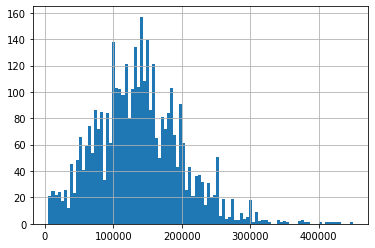

In [50]:
x=ds_df.salary_in_usd # objeto de tipo series
h=x.hist(bins=100)
